In [1]:
from pin import pin
import matplotlib.pyplot as plt
from collections import Counter

import json
import os
import autograd.numpy as np
import pickle as pkl

%matplotlib inline
%load_ext autoreload
%autoreload 2

/home/ericmjl/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/ericmjl/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [2]:
with open('../data/batch_summary.json') as f:
    model_data = json.load(f)

In [3]:
model_data['projects'][0]

{'code': 'wJ9TDy',
 'created': '2016-01-02',
 'models': [{'GMQE': 0.9800000191,
   'id': '01',
   'oligo_state': 'homo-dimer',
   'qmean': 0.3202740713,
   'seq_coverage': 1.0,
   'seq_id': 91.9191894531,
   'seq_sim': 0.5824936032,
   'status': 'COMPLETED',
   'template': '4ll3.1.B',
   'tpl_seq': 'PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKMIGGIGGFIKVRQYDQILIEICGHKAIGTVLVGPTPVNIIGRNLLTQIGCTLNF',
   'trg_seq': 'PQITLWQRPLVTIKIEGQLKEALLDTGADDTVLEEINLSGKWKPKMIGGIGGFIKVGQYDQITIEICGHKVIGTVLVGPTPVNIIGRNLLTQLGCTLNF'},
  {'GMQE': 0.9800000191,
   'id': '02',
   'oligo_state': 'homo-dimer',
   'qmean': -0.9170268789,
   'seq_coverage': 1.0,
   'seq_id': 91.9191894531,
   'seq_sim': 0.5824936032,
   'status': 'COMPLETED',
   'template': '1a8g.1.A',
   'tpl_seq': 'PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKMIGGIGGFIKVRQYDQILIEICGHKAIGTVLVGPTPVNIIGRNLLTQIGCTLNF',
   'trg_seq': 'PQITLWQRPLVTIKIEGQLKEALLDTGADDTVLEEINLSGKWKPKMIGGIGGFIKVGQYDQITIEICGHKVIGTVLVGPTPVNIIGRNLLTQLGCTLNF'},
  {'GMQE': 0

In [4]:
# Grab some summary statistics of the modelling.
# I'm curious to know how many times a particular template was chosen.

template_counter = Counter()
gmqe_scores = []
sequence_identity = []
sequence_similarity = []
for p in model_data['projects']:
    for m in p['models']:
        template_counter[m['template']] += 1
        gmqe_scores.append(m['GMQE'])
        sequence_identity.append(m['seq_id'])
        sequence_similarity.append(m['seq_sim'])

(array([  2.00000000e+00,   0.00000000e+00,   1.00000000e+01,
          1.60000000e+01,   7.40000000e+01,   2.77000000e+02,
          1.15600000e+03,   1.06300000e+03,   2.13600000e+03,
          5.46600000e+03]),
 array([ 0.92199999,  0.92879999,  0.93559999,  0.9424    ,  0.9492    ,
         0.956     ,  0.9628    ,  0.9696    ,  0.97640001,  0.98320001,
         0.99000001]),
 <a list of 10 Patch objects>)

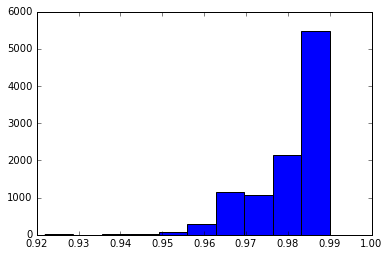

In [7]:
plt.hist(gmqe_scores)

(array([   31.,    94.,   303.,  1017.,  1114.,  1457.,  2923.,  2059.,
          959.,   243.]),
 array([  76.76767731,   79.09090958,   81.41414185,   83.73737411,
          86.06060638,   88.38383865,   90.70707092,   93.03030319,
          95.35353546,   97.67676773,  100.        ]),
 <a list of 10 Patch objects>)

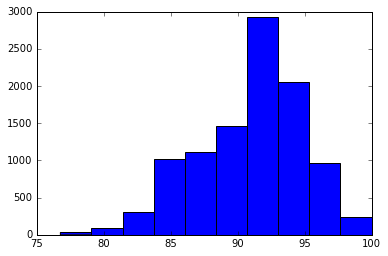

In [8]:
plt.hist(sequence_identity)

(array([    5.,    31.,   141.,   351.,   739.,  1263.,  1859.,  3049.,
         2326.,   436.]),
 array([ 0.5494988 ,  0.55562665,  0.5617545 ,  0.56788235,  0.57401021,
         0.58013806,  0.58626591,  0.59239376,  0.59852161,  0.60464947,
         0.61077732]),
 <a list of 10 Patch objects>)

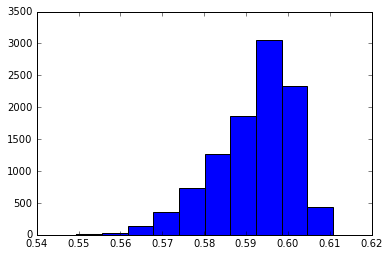

In [9]:
plt.hist(sequence_similarity)

In [10]:
model_data['projects'][0]

{'code': 'wJ9TDy',
 'created': '2016-01-02',
 'models': [{'GMQE': 0.9800000191,
   'id': '01',
   'oligo_state': 'homo-dimer',
   'qmean': 0.3202740713,
   'seq_coverage': 1.0,
   'seq_id': 91.9191894531,
   'seq_sim': 0.5824936032,
   'status': 'COMPLETED',
   'template': '4ll3.1.B',
   'tpl_seq': 'PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKMIGGIGGFIKVRQYDQILIEICGHKAIGTVLVGPTPVNIIGRNLLTQIGCTLNF',
   'trg_seq': 'PQITLWQRPLVTIKIEGQLKEALLDTGADDTVLEEINLSGKWKPKMIGGIGGFIKVGQYDQITIEICGHKVIGTVLVGPTPVNIIGRNLLTQLGCTLNF'},
  {'GMQE': 0.9800000191,
   'id': '02',
   'oligo_state': 'homo-dimer',
   'qmean': -0.9170268789,
   'seq_coverage': 1.0,
   'seq_id': 91.9191894531,
   'seq_sim': 0.5824936032,
   'status': 'COMPLETED',
   'template': '1a8g.1.A',
   'tpl_seq': 'PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKMIGGIGGFIKVRQYDQILIEICGHKAIGTVLVGPTPVNIIGRNLLTQIGCTLNF',
   'trg_seq': 'PQITLWQRPLVTIKIEGQLKEALLDTGADDTVLEEINLSGKWKPKMIGGIGGFIKVGQYDQITIEICGHKVIGTVLVGPTPVNIIGRNLLTQLGCTLNF'},
  {'GMQE': 0

In [25]:
# Write the python script here
script = '\n\
import networkx as nx\n\
import pickle\n\
from pin.pin import ProteinInteractionNetwork\n\
\n\
p = ProteinInteractionNetwork("model_01.pdb")\n\
with open("model_01.pkl", "wb") as f:\n\
    pickle.dump(p, f)\n\
'
print(script)


import networkx as nx
import pickle
from pin.pin import ProteinInteractionNetwork

p = ProteinInteractionNetwork("model_01.pdb")
with open("model_01.pkl", "wb") as f:
    pickle.dump(p, f)



In [26]:
# Write the bash script here
bash = '\n\
#!/bin/sh \n\
#$ -S /bin/sh \n\
#$ -cwd \n\
#$ -V \n\
#$ -m e \n\
#$ -M ericmjl@mit.edu \n\
#$ -pe whole_nodes 1 \n\
#############################################\n\
\n\
python script.py\n\
'

print(bash)


#!/bin/sh 
#$ -S /bin/sh 
#$ -cwd 
#$ -V 
#$ -m e 
#$ -M ericmjl@mit.edu 
#$ -pe whole_nodes 1 
#############################################

python script.py



In [27]:
# Write a master script for q-subbing
qsub = '\n\
#!/bin/sh \n\
#$ -S /bin/sh \n\
#$ -cwd \n\
#$ -V \n\
#$ -m e \n\
#$ -M ericmjl@mit.edu \n\
#$ -pe whole_nodes 1 \n\
#############################################\n\
\n\
'

print(qsub)


#!/bin/sh 
#$ -S /bin/sh 
#$ -cwd 
#$ -V 
#$ -m e 
#$ -M ericmjl@mit.edu 
#$ -pe whole_nodes 1 
#############################################




In [28]:
# Write script to disk
mdl_dir = '../data/batch_models/'
for project in model_data['projects']:
    code = project['code']
    with open('{0}/{1}/script.py'.format(mdl_dir, code), 'w+') as f:
        f.write(script)
    with open('{0}/{1}/{1}.sh'.format(mdl_dir, code), 'w+') as f:
        f.write(bash)
        

with open('{0}/master.sh'.format(mdl_dir), 'w+') as f:
    f.write(qsub)
    for project in model_data['projects']:
        
        f.write('cd {0}\n'.format(project['code']))
        f.write('qsub {0}.sh\n'.format(project['code']))
        f.write('cd ..\n')
        f.write('\n')

# Prototype script for parallelizing making graphs and doing deep learning on them

In [14]:
import pandas as pd

protease_data = pd.read_csv('../data/hiv_data/hiv-protease-data-expanded.csv', index_col=0)
protease_data.describe()

,ATV,DRV,FPV,IDV,LPV,NFV,SQV,SeqID,TPV,weight
count,5051.000000,2838.000000,6660.000000,6654.000000,6049.000000,6868.000000,6663.000000,6979.000000,4329.000000,6979.000000
mean,60.787349,22.294856,23.945511,29.115104,55.100380,49.808736,77.044349,110069.076659,9.378517,0.249033
std,138.450445,77.386476,58.589808,65.169955,99.343837,105.497697,214.590607,61028.133923,38.791570,0.316821
min,0.300000,0.200000,0.100000,0.100000,0.100000,0.100000,0.100000,2996.000000,0.200000,0.020833
25%,1.000000,0.700000,0.800000,0.900000,0.900000,1.300000,0.800000,64725.000000,0.800000,0.031250
50%,7.400000,1.000000,2.100000,4.400000,7.800000,10.000000,2.500000,112389.000000,1.300000,0.125000
75%,46.000000,7.000000,16.000000,28.000000,74.000000,53.000000,30.150000,143350.000000,3.500000,0.250000
max,700.000000,580.000000,400.000000,500.000000,500.000000,600.000000,1000.000000,259265.000000,800.000000,1.000000


Based on the number of samples available for each drug, let us start with NFV, which has the most number of values available.

In [15]:
protease_data['NFV'].describe()

count    6868.000000
mean       49.808736
std       105.497697
min         0.100000
25%         1.300000
50%        10.000000
75%        53.000000
max       600.000000
Name: NFV, dtype: float64

I will log-transform these values, and then Z-standardize them.

,FPV,seqid
0,0.397940,2996-0
1,0.397940,2996-1
2,-0.154902,4387-0
3,-0.154902,4387-1
4,-0.154902,4387-2


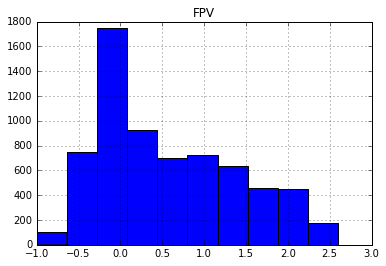

In [16]:
import sklearn.preprocessing as pp
# from sklearn.preprocessing import scale
import numpy as np

# Drop NaN values on only the NFV column
fpv_data = protease_data.dropna(subset=['FPV'])[['FPV', 'seqid']]
fpv_data['FPV'] = fpv_data['FPV'].apply(np.log10)
# fpv_data['FPV_scaled'] = pp.scale(fpv_data['FPV'])
fpv_data.hist()
fpv_data.head()

In [17]:
# Grab out a sample of projects, based on the seqid.
import random as rnd
# seqids_interest = rnd.sample(list(fpv_data['seqid']), 25)

proj_titles = {c['title']:c['code'] for c in model_data['projects']}


projs_interest = dict()

n_graphs = 4

while len(projs_interest) < n_graphs:
    seqid = rnd.choice(list(fpv_data['seqid']))
    if seqid in proj_titles.keys():
        projs_interest[seqid] = proj_titles[seqid]
        
        
        
# for seqid in :
#     if seqid not in proj_titles:
#         print(seqid)
# projects_interest = {c['title']:c['code'] for c in model_data['projects'] if c['title'] in seqids_interest}
projs_interest

{'102798-2': 'zB9kN6',
 '112387-1': 'a8TXLz',
 '61139-1': 'waZQPE',
 '66668-0': 'jB4TGE'}

In [18]:
fpv_data[fpv_data['seqid'].isin(projs_interest.keys())]

,FPV,seqid
1639,1.397940,61139-1
1954,0.255273,66668-0
3093,0.973128,102798-2
3464,0.939519,112387-1


In [19]:
projects = [i for i in projs_interest.values()]

p = pin.ProteinInteractionNetwork('../data/batch_models/{0}/model_01.pdb'.format(projects[0]))
p.graph['project'] = project
p.graph['input_shape'] = p.nodes(data=True)[0][1]['features'].shape
p.graph['seqid'] = seqid



In [20]:
# Takes about 2 hours for the task to finish over 3401 graphs. This is it being done on a single core.
from tqdm import tqdm
from joblib import Parallel, delayed
graphs = []

def make_protein_graphs(project, seqid):
    """
    Custom function for this notebook to parallelize the making of protein graphs over individual cores.
    """
    from pin import pin
    p = pin.ProteinInteractionNetwork('../data/batch_models/{0}/model_01.pdb'.format(project))
    p.graph['project'] = project
    p.graph['input_shape'] = p.nodes(data=True)[0][1]['features'].shape
    p.graph['seqid'] = seqid
    return p

graphs = Parallel(n_jobs=-1)(delayed(make_protein_graphs)(proj, seqid) for seqid, proj in projs_interest.items())
len(graphs)

4

In [21]:
# Check a sample of the graphs to make sure that the input shapes are correct.
graphs[0].graph['input_shape']

(1, 36)

In [22]:
from graphfp.layers import FingerprintLayer, GraphInputLayer, LinearRegressionLayer, GraphConvLayer,\
    FullyConnectedLayer, DropoutLayer
from graphfp.utils import initialize_network, batch_sample

In [23]:
graphs[0].nodes(data=True)[0][1]['features'].shape

(1, 36)

In [33]:
def train_loss(wb_vect, unflattener, batch=True, batch_size=2, debug=False):
    """
    Training loss is MSE.

    We pass in a flattened parameter vector and its unflattener.
    """
    wb_struct = unflattener(wb_vect)

    if batch:
        batch_size = batch_size
    else:
        batch_size = len(graphs)

    samp_graphs, samp_inputs = batch_sample(graphs, input_shape, batch_size)

    preds = predict(wb_struct, samp_inputs, samp_graphs)
    graph_ids = [g.graph['seqid'] for g in samp_graphs]
    # graph_scores = fpv_data[fpv_data['seqid'].isin(graph_ids)]['FPV'].values.reshape(preds.shape)
    graph_scores = fpv_data.set_index('seqid').ix[graph_ids]['FPV'].values.reshape(preds.shape)
    assert preds.shape == graph_scores.shape
    
    if debug:
        print(graph_ids)
        print('Predictions:')
        print(preds)
        print('Mean: {0}'.format(np.mean(preds)))
        print('')
        print('Actual')
        print(graph_scores)
        print('Mean: {0}'.format(np.mean(graph_scores)))
        print('')
        print('Difference')
        print(preds - graph_scores)
        print('Mean Squared Error: {0}'.format(np.mean(np.power(preds - graph_scores, 2))))
        print('')
    # print(preds.shape, graph_scores.shape)
    # assert preds.shape[1] == graph_scores.shape[1]
    # print(preds - graph_scores)
    mse = np.mean(np.power(preds - graph_scores, 2))
    return mse

In [34]:
# fpv_data[fpv_data['seqid'].isin(['2996-1', '2996-0'])]
graph_ids = ['4387-1', '2996-1', '2996-0', '4482-1']
fpv_data.set_index('seqid').ix[graph_ids]['FPV'].values.reshape((4,1))

array([[-0.15490196],
       [ 0.39794001],
       [ 0.39794001],
       [ 0.59106461]])

In [35]:
def predict(wb_struct, inputs, graphs):
    """
    Makes predictions by running the forward pass over all of the layers.

    Parameters:
    ===========
    - wb_struct: a dictionary of weights and biases stored for each layer.
    - inputs: the input data matrix. should be one row per graph.
    - graphs: a list of all graphs.
    """
    curr_inputs = inputs

    for i, layer in enumerate(layers):
        # print(type(wb_struct))
        wb = wb_struct['layer{0}_{1}'.format(i, layer)]
        curr_inputs = layer.forward_pass(wb, curr_inputs, graphs)
    return curr_inputs

In [36]:
def callback(wb, i):
    """
    Any function you want to run at each iteration of the optimization.
    """
    # from time import time
    from graphfp.flatten import flatten

    # new_time = time()
    wb_vect, wb_unflattener = flatten(wb)
    print('Iteration: {0}'.format(i))
    # print('Computing gradient w.r.t. weights...')

    print('Training Loss: ')
    
    tl = train_loss(wb_vect, wb_unflattener, batch=False)
    print(tl)
    print('')

    training_losses.append(tl)

In [37]:
from autograd import grad
grad_tl = grad(train_loss)

In [38]:
len(graphs[0])

198

In [39]:
import networkx as nx
from collections import Counter
Counter([len(graphs[0].neighbors(n)) for n in graphs[0].nodes()])

Counter({0: 2,
         1: 9,
         2: 69,
         3: 42,
         4: 12,
         5: 14,
         6: 16,
         7: 12,
         8: 9,
         9: 5,
         10: 4,
         11: 4})

In [63]:
from graphfp.optimizers import sgd, adam

input_shape = graphs[0].graph['input_shape']
layers = [# GraphConvLayer((input_shape[1], input_shape[1] * 2)),
          # GraphConvLayer((input_shape[1], input_shape[1])),
          # GraphConvLayer((input_shape[1], input_shape[1])),
          GraphConvLayer((input_shape[1], input_shape[1])),
          FingerprintLayer(input_shape[1]),
          # FullyConnectedLayer((input_shape[1], input_shape[1])),
          # DropoutLayer(p=0),
          # FullyConnectedLayer((input_shape[1], input_shape[1])),
          # DropoutLayer(p=0.3),
          # FullyConnectedLayer((input_shape[1], input_shape[1])),
          LinearRegressionLayer((input_shape[1], 1)),
]

wb_all = initialize_network(input_shape, graphs, layers)

training_losses = list()

In [64]:
from graphfp.flatten import flatten
wb_vect, wb_unflattener = flatten(wb_all)
train_loss(wb_vect, wb_unflattener, debug=True)

['61139-1', '66668-0']
Predictions:
[[ 0.00202669]
 [ 0.00200087]]
Mean: 0.0020137820125656902

Actual
[[ 1.39794001]
 [ 0.25527251]]
Mean: 0.8266062568876719

Difference
[[-1.39591332]
 [-0.25327163]]
Mean Squared Error: 1.0063602570175394



1.0063602570175394

In [65]:
wb_vect, wb_unflattener = adam(grad_tl, wb_all, callback=clbk, num_iters=1000)
wb_all = wb_unflattener(wb_vect)

Iteration: 0
Training Loss: 
0.958683847731

Iteration: 1
Training Loss: 
0.85574625148

Iteration: 2
Training Loss: 
0.692849730205

Iteration: 3
Training Loss: 
0.470798874929

Iteration: 4
Training Loss: 
0.25610279

Iteration: 5
Training Loss: 
0.142365458042

Iteration: 6
Training Loss: 
0.213195179494

Iteration: 7
Training Loss: 
0.247360795651

Iteration: 8
Training Loss: 
0.194211675821

Iteration: 9
Training Loss: 
0.141595420563

Iteration: 10
Training Loss: 
0.142453463102

Iteration: 11
Training Loss: 
0.182790006674

Iteration: 12
Training Loss: 
0.224292844583

Iteration: 13
Training Loss: 
0.252211207652

Iteration: 14
Training Loss: 
0.275144920839

Iteration: 15
Training Loss: 
0.271139273145

Iteration: 16
Training Loss: 
0.260295271967

Iteration: 17
Training Loss: 
0.232559707405

Iteration: 18
Training Loss: 
0.183562419011

Iteration: 19
Training Loss: 
0.136512923223

Iteration: 20
Training Loss: 
0.119878363623

Iteration: 21
Training Loss: 
0.13110443196

Iter

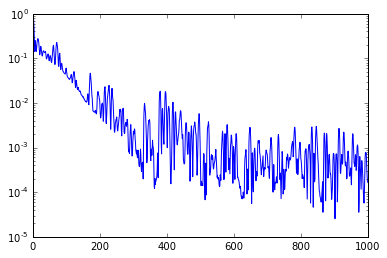

In [69]:
plt.plot(training_losses)
plt.yscale('log')

In [70]:
from graphfp.flatten import flatten
wb_vect, wb_unflattener = flatten(wb_all)
train_loss(wb_vect, wb_unflattener, debug=True)

['66668-0', '112387-1']
Predictions:
[[ 0.26481597]
 [ 0.94829197]]
Mean: 0.6065539727816811

Actual
[[ 0.25527251]
 [ 0.93951925]]
Mean: 0.5973958788609622

Difference
[[ 0.00954347]
 [ 0.00877272]]
Mean Squared Error: 8.40191984243525e-05



8.4019198424352507e-05

In [72]:
wb_all['layer0_GraphConvLayer']['weights'].max()

0.18730440864022327